## Лабораторная работа 9

Понижение размерности признакового пространства

Выполнил: 6132-010402D, Рудинская Елизавета Андреевна

0. Найти датасет для кластеризации: для этого берём датасет для мультиклассовой классификации и временно убираем метки классов. 

Эти метки классов пригодятся нам для оценки качества кластеризации. Хотя в реальной жизни такой роскоши скорее всего не будет, однако наличие априорного знания о кластерах позволит нам посчитать несколько дополнительных метрик. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import manifold, datasets
from sklearn import decomposition

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    silhouette_score,
)
from sklearn.model_selection import GridSearchCV

In [35]:
# Считывание датасета
df = pd.read_csv("spambase.csv")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [7]:
df.dtypes 

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.43      float64
0.778     float64
0.44      float64
0.45      float64
3.756     float64
61        

### Описание датасета 

Attribute Information: The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

1. Визуализируйте точки из исходного признакового пространства в 2-мерном пространстве двух признаков, используя алгоритм t-SNE (sklearn.manifold.TSNE). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [36]:
temp = df.drop(columns=['1'])

In [37]:
%%time
tsne = TSNE(n_components=2, n_iter=300, n_jobs=-1)
tsne_data = tsne.fit_transform(temp)

c:\Users\rudinskaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\rudinskaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 43.6 s
Wall time: 5.05 s


<AxesSubplot:title={'center':'TSNE'}>

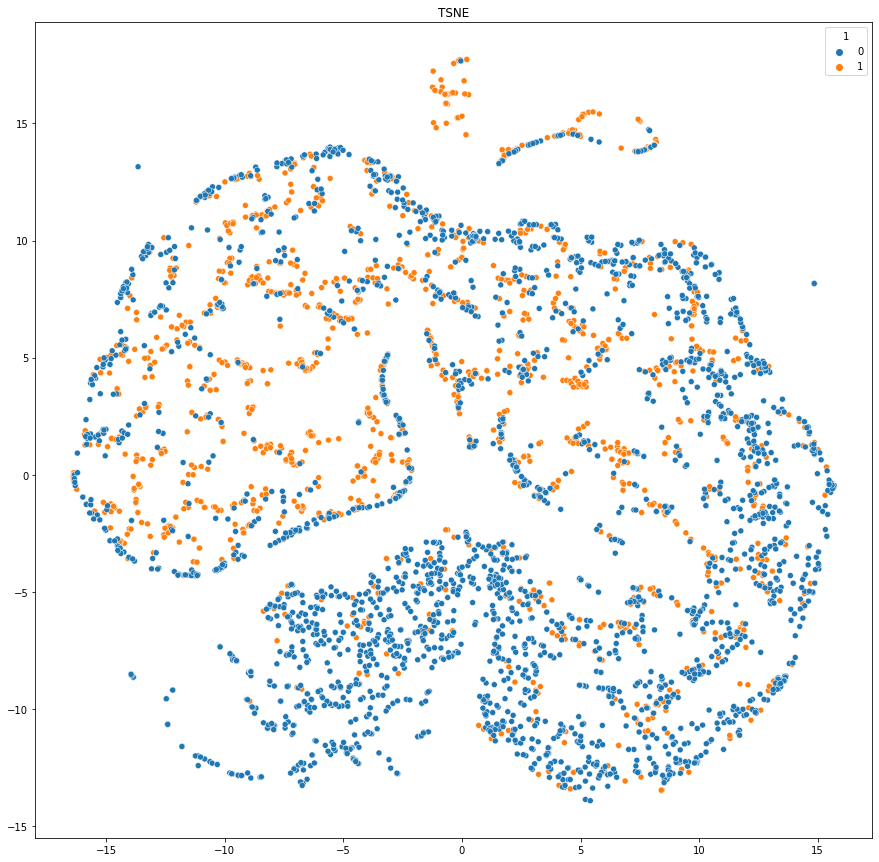

In [38]:
plt.figure(figsize=(15,15))
plt.title("TSNE")
sns.scatterplot(x=tsne_data[:,0],y=tsne_data[:,1],hue=df['1'])

2. Визуализируйте точки из исходного признакового пространства в 2-мерном пространстве, используя метод главных компонент (sklearn.decomposition.PCA) или Truncated SVD (sklearn.decomposition.TruncatedSVD). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [41]:
%%time
pca = PCA(n_components=2)
pca_data = pca.fit_transform(temp)

CPU times: total: 46.9 ms
Wall time: 26.9 ms


<AxesSubplot:title={'center':'PCA'}>

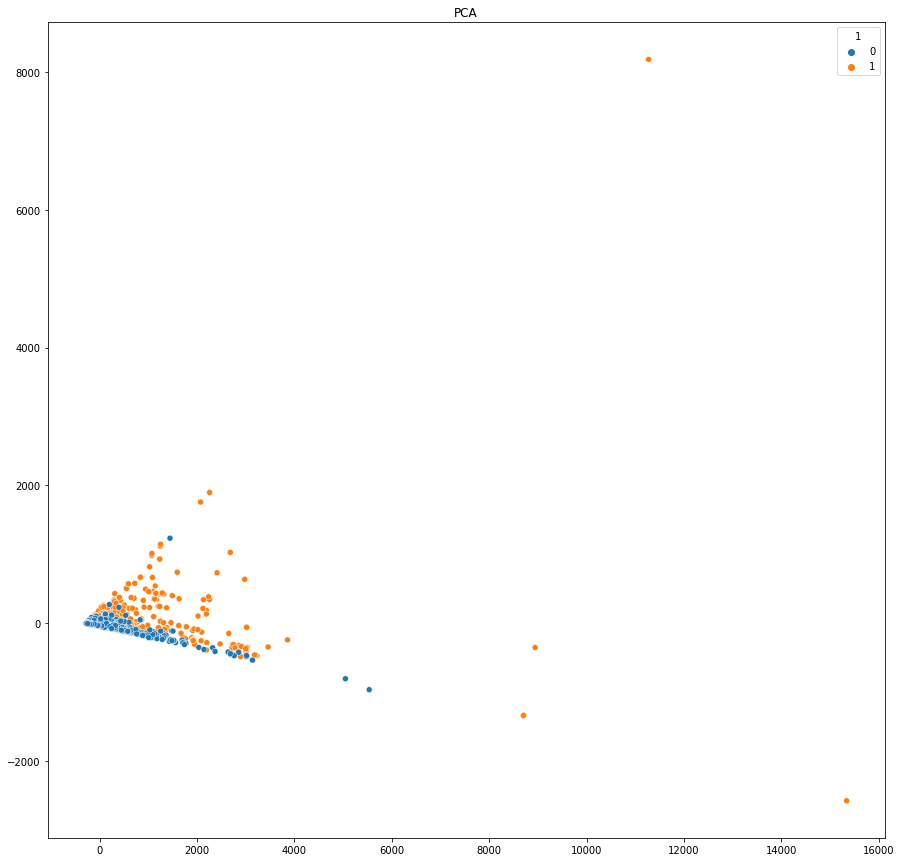

In [42]:
plt.figure(figsize=(15,15))
plt.title("PCA")
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=df['1'])

In [43]:
%%time
tsvd = TruncatedSVD(n_components=2,n_iter=1000)
tsvd_data = tsvd.fit_transform(temp)

CPU times: total: 4.3 s
Wall time: 1.07 s


<AxesSubplot:title={'center':'TruncatedSVD'}>

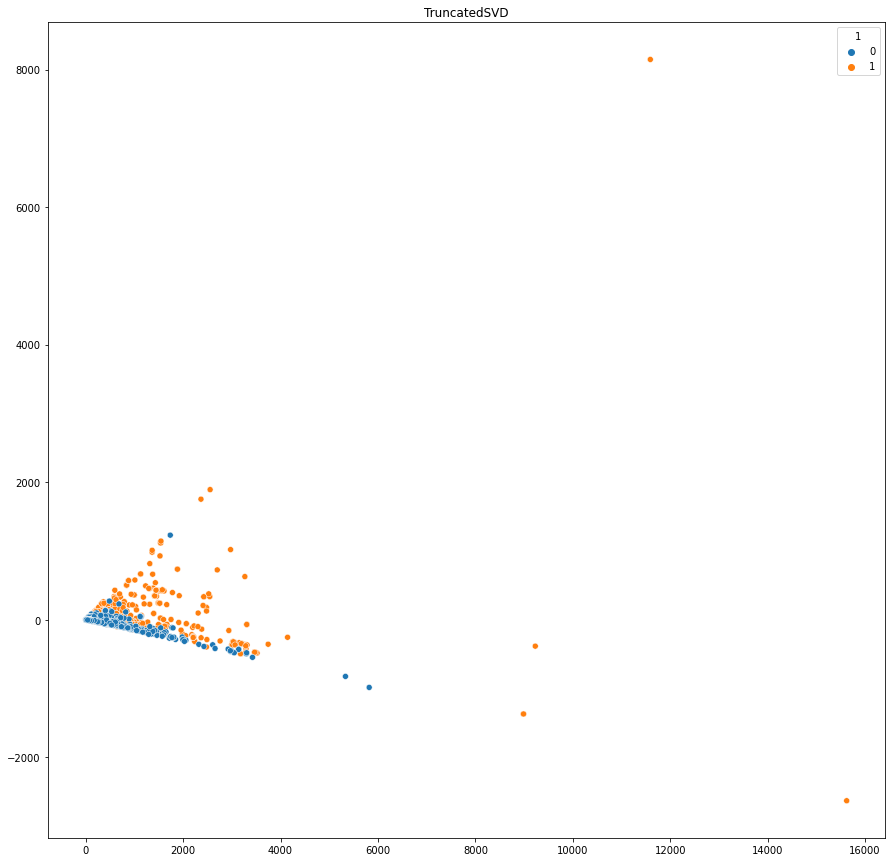

In [44]:
plt.figure(figsize=(15,15))
plt.title("TruncatedSVD")
sns.scatterplot(x=tsvd_data[:,0],y=tsvd_data[:,1],hue=df['1'])

3. На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. Чтобы оценить необходимое количество компонент, постройте график Number of components / Total explained variance. Пример построения есть в статье от ODS.

In [45]:
components_ratio = PCA().fit(temp).explained_variance_ratio_*100

In [46]:
components_ratio.shape

(57,)

Text(0, 0.5, 'Explained variance ratio')

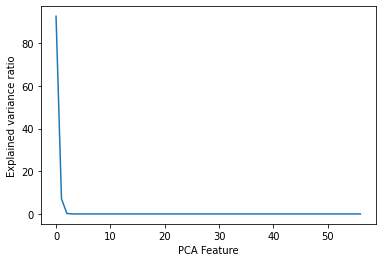

In [47]:
plt.plot(range(components_ratio.size), components_ratio)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance ratio')

Text(0, 0.5, 'Total explained variance ratio')

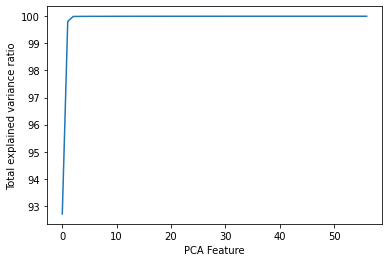

In [48]:
plt.plot(range(components_ratio.size), np.cumsum(components_ratio))
plt.xlabel('PCA Feature')
plt.ylabel('Total explained variance ratio')

4. Используя любой алгоритм классификации, исследуйте влияние понижения размерности признакового пространства на качество классификации. Обучите модель, используя все признаки,затем обучите модель после понижения признаковго пространства. Сравните метрики качества двух моделей. Сделайте выводы. Для выполнения данного задания набор данных можете взять новый.

PS: если исходные признаки были сильно коррелированы и вы правильно провели процедуру снижения размерности, оставив "правильное" число главных компонент, не потеряв существенной информации при этом, качество некоторых моделей может вырасти. Но в данной работе не требуется, чтобы непременно был выигрыш.

In [49]:
estimator = RandomForestClassifier()
scaler = StandardScaler()

In [53]:
features = df.drop(columns=['1'])
target = df['1']
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3, random_state=13)

In [54]:
%%time
# Scaler  ->  KNN
basic_pipe = make_pipeline(scaler, estimator)
basic_pipe.fit(X_train, y_train)
pred = basic_pipe.predict(X_test)
print(f"score on train: {basic_pipe.score(X_train, y_train)}")
print(f"score on test: {basic_pipe.score(X_test, y_test)}")

score on train: 0.9996894409937889
score on test: 0.9420289855072463
CPU times: total: 484 ms
Wall time: 499 ms


In [55]:
%%time
# Scaler -> PCA(2) -> KNN
pipe = make_pipeline(scaler, PCA(n_components=2), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 0.9990683229813665
score on test: 0.8572463768115942
CPU times: total: 391 ms
Wall time: 390 ms


In [56]:
%%time
# Scaler -> PCA(4) -> KNN
pipe = make_pipeline(scaler, PCA(n_components=4), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 0.9928571428571429
score on test: 0.8963768115942029
CPU times: total: 688 ms
Wall time: 551 ms


In [57]:
%%time
# Scaler -> PCA(6) -> KNN
pipe = make_pipeline(scaler, PCA(n_components=6), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 0.9804347826086957
score on test: 0.8992753623188405
CPU times: total: 531 ms
Wall time: 529 ms


In [58]:
%%time
# Scaler -> PCA(8) -> KNN
pipe = make_pipeline(scaler, PCA(n_components=8), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 0.9791925465838509
score on test: 0.9057971014492754
CPU times: total: 531 ms
Wall time: 534 ms


<AxesSubplot:>

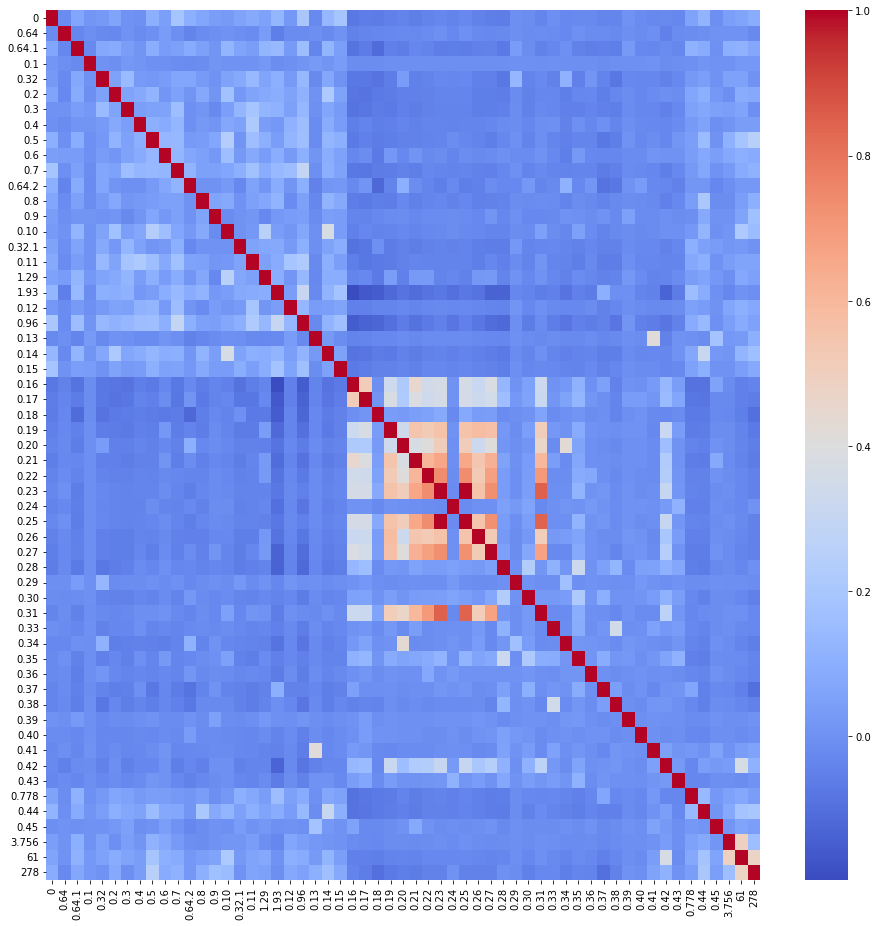

In [59]:
plt.figure(figsize=(16, 16))
sns.heatmap(temp.corr(), cmap= 'coolwarm')